In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\UmerSalman\\Downloads\\train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
label = df['label']
data = df.drop('label',axis=1)

In [11]:
label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

corresponding label for it is 0


C:\Users\UmerSalman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


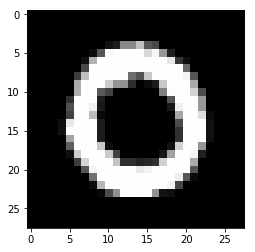

In [19]:
indx = 1
grind_data = data.iloc[indx].as_matrix().reshape(28,28)
plt.imshow(grind_data,cmap='gray')
print('corresponding label for it is {}'.format(label[indx]))

In [23]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler()
scaled_data = scaled_data.fit_transform(data)
print(scaled_data.shape)

C:\Users\UmerSalman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\Users\UmerSalman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# PCA for visualization

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca_data = PCA(n_components=2)

In [24]:
pca_data = pca_data.fit_transform(scaled_data)

In [27]:
print('shape of the pca data', pca_data.shape)
print('shape of label ',label.shape)

shape of the pca data (42000, 2)
shape of label  (42000,)


In [37]:
new_coordinates = pca_data.T
new_coordinates = np.vstack((new_coordinates,label)).T
print(new_coordinates.shape)

(42000, 3)


In [35]:
pca_data.T.shape

(2, 42000)

In [36]:
label.shape

(42000,)

In [38]:
new_data = pd.DataFrame(data = new_coordinates,columns=('1st_principle','2nd_principle','label'))

In [40]:
new_data.head()

,1st_principle,2nd_principle,label
0,-5.140483,-5.226403,1.0
1,19.292313,6.033272,0.0
2,-7.644499,-1.705759,1.0
3,-0.474219,5.836234,4.0
4,26.559565,6.024901,0.0


In [41]:
import seaborn as sns

C:\Users\UmerSalman\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


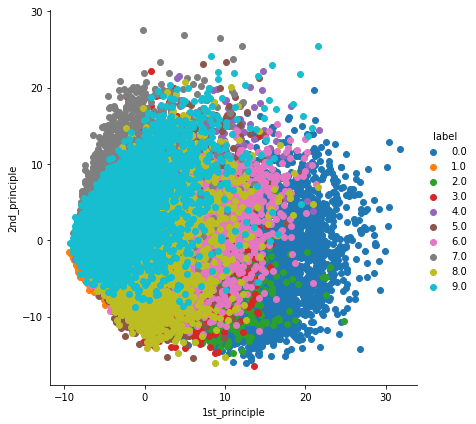

In [43]:
sns.FacetGrid(data = new_data,hue='label',size=6).map(plt.scatter,'1st_principle','2nd_principle').add_legend()